# GIS Python

### Import Python library

In [1]:
import shapely as shp
import os
import sys
import pandas as pd
import numpy as np 
import sklearn as sk
import gdal as gd
import geopandas as gpd
from fiona.crs import from_epsg

##### 1. Read all shapefiles in Python

In [2]:
# Using geopandas to read files
path=r"C:\Users\DELL\OneDrive - tuaf.edu.vn\TUAF\Python_Tutorial" # Define the data path

files=os.listdir(path)
# Save all shapefiles in a list

shape1=[]

for shape_file in files:
    if shape_file.endswith(".shp"):
        
        shape1.append(os.path.join(path,shape_file))
        
print("An example: ",shape1[2])
# Calculate the numbers of shapefile in shape1 list
sum1=0

for i in shape1:
    a=shape1.count(i)
    sum1+=a
print("Total number of shapefiles=",sum1)

for shape_file in shape1:
    myfile=gpd.read_file(shape_file) # Read all shapefiles available 
    print(myfile.crs.to_epsg())
    break


An example:  C:\Users\DELL\OneDrive - tuaf.edu.vn\TUAF\Python_Tutorial\DoDoc.shp
Total number of shapefiles= 21
None


##### 2. Check the projection, reproject and define new project of no projection and save it in to three geometry folders

###### 2a. Make new folders

In [3]:
# Create three folders including Polygon, Linestring, Points
## Polygon folder

Polygon=os.path.join(path,"Polygon")
if os.path.exists(Polygon):
    pass
else:
    os.mkdir(Polygon)

# Linestring folder

Linestring=os.path.join(path,"Linestring")
if os.path.exists(Linestring):
    pass
else:
    os.mkdir(Linestring)

# Points folder

Points=os.path.join(path,"Points")
if os.path.exists(Points):
    pass
else:
    os.mkdir(Points)

All_points=os.path.join(path,"All_points")

if os.path.exists(All_points):
    pass
else:
    os.mkdir(All_points)

In [4]:
# Test to connect folders with new names by replacing .shp by .csv
os.path.join(Points,shape1[2][0:-4]+".csv")


'C:\\Users\\DELL\\OneDrive - tuaf.edu.vn\\TUAF\\Python_Tutorial\\DoDoc.csv'

###### 2a. Check projection, reprojection and defining new projection 

In [5]:

for shape_file in shape1:
    myfile=gpd.read_file(shape_file) # Read all shapefiles available 
    try:
        if myfile.crs.to_epsg()==32648:
            if "POLYGON" in myfile.geometry.geom_type[0].upper(): # Check if the shape is a Polygon
                myfile["Area"]=round(myfile.geometry.area,2) # Calculate the area of each Polygon
                myfile["Centroid"]=myfile.geometry.centroid
                poly=myfile.drop(["geometry"],axis=1)
                poly=poly.rename(columns={"Centroid":"geometry"},inplace=False)
                poly.to_csv(os.path.join(Polygon,os.path.basename(shape_file[0:-4]) +".csv"))
                poly.to_file(os.path.join(All_points,os.path.basename(shape_file)))

            elif "LINESTRING" in myfile.geometry.geom_type[0].upper():
                myfile["Distance"]=round(myfile.geometry.length,2)
                myfile["Centroid"]=myfile.geometry.centroid
                lines=myfile.drop(["geometry"],axis=1)
                lines=lines.rename(columns={"Centroid":"geometry"},inplace=False)
                lines.to_csv(os.path.join(Linestring,os.path.basename(shape_file[0:-4])+".csv"))
                lines.to_file(os.path.join(All_points,os.path.basename(shape_file)))

            else:
                myfile["Long"]=myfile.geometry.x
                myfile["Lat"]=myfile.geometry.y
                myfile.to_csv(os.path.join(Points,os.path.basename(shape_file[0:-4]) +".csv"))
                myfile.to_file(os.path.join(All_points,os.path.basename(shape_file)))


        else: 
            myfile.to_crs(epsg=32648) # Wrong coordinate, reproject it
            if "POLYGON" in myfile.geometry.geom_type[0].upper():
                myfile["Area"]=round(myfile.geometry.area,2)
                myfile["Centroid"]=myfile.geometry.centroid
                poly=myfile.drop(["geometry"],axis=1)
                poly=poly.rename(columns={"Centroid":"geometry"},inplace=False)
                poly.to_csv(os.path.join(Polygon,os.path.basename(shape_file[0:-4])+".csv"))
                poly.to_file(os.path.join(All_points,os.path.basename(shape_file)))
                
            elif "LINESTRING" in myfile.geometry.geom_type[0].upper():
                myfile["Distance"]=myfile.geometry.length
                myfile["Centroid"]=myfile.geometry.centroid
                lines=myfile.drop(["geometry"],axis=1)
                lines=lines.rename(columns={"Centroid":"geometry"},inplace=False)
                lines.to_csv(os.path.join(Linestring,os.path.basename(shape_file[0:-4])+".csv"))
                poly.to_file(os.path.join(All_points,os.path.basename(shape_file)))
                
            else: # If Points 
                myfile["Long"]=myfile.geometry.x
                myfile["Lat"]=myfile.geometry.y
                myfile.to_file(os.path.join(All_points,os.path.basename(shape_file)))


    except AttributeError:
        myfile.set_crs(epsg=32648,allow_override=True)
        if "POLYGON" in myfile.geometry.geom_type[0].upper():
            myfile["Area"]=myfile.geometry.area
            myfile["Centroid"]=myfile.geometry.centroid
            poly=myfile.drop(["geometry"],axis=1)
            poly=poly.rename(columns={"Centroid":"geometry"},inplace=False)
            poly.to_csv(os.path.join(Polygon,os.path.basename(shape_file[0:-4])+".csv"))
            myfile.to_file(os.path.join(All_points,os.path.basename(shape_file)))

        elif "LINESTRING" in myfile.geometry.geom_type[0].upper():
            myfile["Distance"]=myfile.geometry.length
            myfile["Centroid"]=myfile.geometry.centroid
            lines=myfile.drop(["geometry"],axis=1)
            lines=lines.rename(columns={"Centroid":"geometry"},inplace=False)
            lines.to_csv(os.path.join(Linestring,os.path.basename(shape_file[0:-4])+".csv"))
            myfile.to_file(os.path.join(All_points,os.path.basename(shape_file)))

        else:
            myfile["Long"]=myfile.geometry.x
            myfile["Lat"]=myfile.geometry.y
            myfile.to_csv(os.path.join(Points,os.path.basename(shape_file[0:-4])+".csv"))
            myfile.to_file(os.path.join(All_points,os.path.basename(shape_file)))



### Testing rename method if drop geometry and rename it 

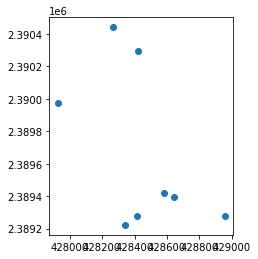

In [12]:
import geopandas as gpd
mydic=r"C:\Users\DELL\OneDrive - tuaf.edu.vn\TUAF\Python_Tutorial\Duongdien-QTQV.shp"
path1=r"C:\Users\DELL\OneDrive - tuaf.edu.vn\TUAF\Python_Tutorial\All_points"
myfile=gpd.read_file(mydic)

myfile.set_crs(epsg=32648,allow_override=True)

myfile["Centroid"]=myfile.geometry.centroid

a=myfile

b=a.set_geometry("Centroid",inplace=False) # We can set column Centroid to be spatial point

myfile=myfile.drop(["geometry"],axis=1)

myfile.head()

myfile=myfile.rename(columns={"Centroid":"geometry"},inplace=False)

myfile.head()

myfile.plot()

myfile.to_file(os.path.join(path1, os.path.basename(mydic)))